# A Manual of Instructional Problems for the U.S.G.S Modflow Model

# Problem 1: The Theis Solution

## Part d
_Another form of symmetry for this problem (radial flow) is a pie shaped wedge with the well at the vertex of the wedge. Unfortunately this geometry is difficult to represent because the finite difference method is based on orthogonality of rows and columns. However, because the model is posed in terms of_ [conductance](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#c) _(a function of grid spacing and transmissivity) and grid block storativity (a function of storage coefficient and area) it is possible to adjust T and S in such a manner to approximate the wedge. Using a 20 m wide row (DELC( 1) = 20) and grid spacing along a row (DELR) as in part b, calculate changes to transmissivity and storage coefficient for a 10° pie wedge. Adjust the well discharge to account for the reduced model domain and input these parameters into the model. Run this one-dimensional model and note drawdown at each time step at an observation point 55 m from the well._

In [1]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy
import scipy.special

In [2]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table1.2b.csv') #opens the csv file
for i,line in enumerate(f): 
    if i == 0: #creates a statement that if i == 0 (if it's the first
        continue #row then it will skip it and move on with the for loop)
    linelist = line.strip().split(',') #line.strip gets rid of any extra spaces in the margins
                                       #split sections of the individual values according to whatever you put in the quotes
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
20.0
30.0
30.0
40.0
60.0
80.0
100.0
150.0
200.0
300.0
[20.0, 30.0, 30.0, 40.0, 60.0, 80.0, 100.0, 150.0, 200.0, 300.0]


### Table 1.1 Original Parameters used in Problem 1

| Variable | Value   |
|----------------------------|-----------------|
| Initial head               | 0.0 m           |
| Transmissivity             | .0023 $\frac{m^2}{s}$    |
| Storage coefficient        | .00075          |
| Pumping rate               | ${4 x 10^{-3}} \frac{m^3}{s}$ |
| Final time                 | 86400 s         |
| Number of time steps       | 20              |
| Time step expansion factor | 1.3             |
| Iteration parameters       | 5               |
| Closure criterion          | 0.0001          |
| Maximum number iterations  | 50              |

In [2]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
trans =  .0023 #transmissivity (is equal to hk*(top-botm))
ss = 0.00075 #storage coefficient
pr = 4.e-3 #pumping rate
perlen = 86400 #final time (period length)
nstp = 20 #number of time steps
tsmult = 1.3 #time step expansion factor (time step multiplier)
it = 5 #iteration parameters
hclose = 1.e-4 #closure criterion (the head change criterion for convergence)
mxiter = 50 #maximum number of iterations
nlay = 1 #layer 1
nrow = 1 #row 1
ncol = 10 #column 10

### Table 1.3 Calculations for determination of transmissivity and storage coefficient for wedge-shaped domain (part d)

| Block number j | Area DELC x DELR | Radius to block edge | Individual block are of 10° wedge | (Wedge area) / (actual area) | Radius to block midpoint | 10° arc length | (10° arc length) / (actual DELC) |
|----------------|------------------|----------------------|-----------------------------------|--------------------------|--------------------------|----------------|------------------------------|
| 1              | 400              | 10                   | 8.73                              | 0.022                    | 5                        | 0.873          | 0.044                        |
| 2              | 600              | 40                   | 130.9                             | 0.218                    | 25                       | 4.363          | 0.218                        |
| 3              | 600              | 70                   | 288.0                             | 0.480                    | 55                       | 9.599          | 0.480                        |
| 4              | 800              | 10                   | 628.32                            | 0.785                    | 90                       | 15.71          | 0.785                        |
| 5              | 1200             | 170                  | 1466.1                            | 1.222                    | 140                      | 23.43          | 1.222                        |
| 6              | 1600             | 250                  | 2932.2                            | 1.833                    | 210                      | 36.652         | 1.833                        |
| 7              | 2000             | 350                  | 5236.0                            | 2.618                    | 300                      | 52.360         | 2.618                        |
| 8              | 3000             | 500                  | 11126.5                           | 3.709                    | 425                      | 74.176         | 3.709                        |
| 9              | 4000             | 700                  | 20944.0                           | 5.236                    | 600                      | 104.72         | 5.236                        |
| 10             | 6000             | 1000                 | 44505.9                           | 7.418                    | 850                      | 148.35         | 7.418                        |

Now you must go create separate .csv files for the radius, the individual wedge area, and the actual area because you are going to need their values for some calculations.

In [11]:
#print list for radius (r)
print(os.getcwd())
radius = [] #creates an empty list
f = open('../Data/table1.3_radius.csv') #opens the csv file
for i,line in enumerate(f): 
    if i == 0: #creates a statement that if i == 0 (if it's the first
        continue #row then it will skip it and move on with the for loop)
    linelist = line.strip().split(',') #line.strip gets rid of any extra spaces in the margins
                                       #split sections of the individual values according to whatever you put in the quotes
    value = float(linelist[0]) #changes the values in the list to floats
    print(value) #prints the values
    radius.append(value) #puts the floats into the empty list, radius 
    
print(radius) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
5.0
25.0
55.0
90.0
140.0
210.0
300.0
425.0
600.0
850.0
[5.0, 25.0, 55.0, 90.0, 140.0, 210.0, 300.0, 425.0, 600.0, 850.0]


In [12]:
#print list for individual block area of a 10° wedge
print(os.getcwd())
ind_wedge = [] #creates an empty list
f = open('../Data/table1.3_individual_wedge.csv') #opens the csv file
for i,line in enumerate(f): 
    if i == 0: #creates a statement that if i == 0 (if it's the first
        continue #row then it will skip it and move on with the for loop)
    linelist = line.strip().split(',') #line.strip gets rid of any extra spaces in the margins
                                       #split sections of the individual values according to whatever you put in the quotes
    value = float(linelist[0]) #changes the values in the list to floats
    print(value) #prints the values
    ind_wedge.append(value) #puts the floats into the empty list, radius 
    
print(ind_wedge) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
8.73
130.9
288.0
628.32
1466.1
2932.2
5236.0
11126.5
20944.0
44505.9
[8.73, 130.9, 288.0, 628.32, 1466.1, 2932.2, 5236.0, 11126.5, 20944.0, 44505.9]


In [13]:
#print list for area DELC x DELR
print(os.getcwd())
act_area = [] #creates an empty list
f = open('../Data/table1.3_actual_area.csv') #opens the csv file
for i,line in enumerate(f): 
    if i == 0: #creates a statement that if i == 0 (if it's the first
        continue #row then it will skip it and move on with the for loop)
    linelist = line.strip().split(',') #line.strip gets rid of any extra spaces in the margins
                                       #split sections of the individual values according to whatever you put in the quotes
    value = float(linelist[0]) #changes the values in the list to floats
    print(value) #prints the values
    act_area.append(value) #puts the floats into the empty list, radius 
    
print(act_area) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
400.0
600.0
600.0
800.0
1200.0
1600.0
2000.0
3000.0
4000.0
6000.0
[400.0, 600.0, 600.0, 800.0, 1200.0, 1600.0, 2000.0, 3000.0, 4000.0, 6000.0]


In [14]:
#change radius to an array
radius_array = np.array(radius)

#change individual block area of a 10° wedge to an array
ind_wedge_array = np.array(ind_wedge)

#change area DELC x DELR to an array
act_area_array = np.array(act_area)

#print the adjusted values to make sure they are correct
print('radius: \n {} \n'.format(radius_array))
print('individual wedge: \n {} \n'.format(ind_wedge_array))
print('actual area: \n {} \n'.format(act_area_array))

radius: 
 [   5.   25.   55.   90.  140.  210.  300.  425.  600.  850.] 

individual wedge: 
 [  8.73000000e+00   1.30900000e+02   2.88000000e+02   6.28320000e+02
   1.46610000e+03   2.93220000e+03   5.23600000e+03   1.11265000e+04
   2.09440000e+04   4.45059000e+04] 

actual area: 
 [  400.   600.   600.   800.  1200.  1600.  2000.  3000.  4000.  6000.] 



### Adjusted Transmissivity
* _To find the 10° arc length; divide 10° by 360° (the total circumference of a circle), then multiply by 2πr
    ~The radius(r) is given in Table 1.3_
* _To find adjusted transmissivity you can just take the "10° arc length" provided in Table 1.3, divide it by actual DELC(20), and multiply it by the original transmissivity(.0023)._
##### Adjusted transmissivity = $\frac{10° arc length}{actual DELC} * transmissivity$

### Adjusted Storage Coefficient
* _To find adjusted storage coefficient; take the "individual block area of 10° wedge" (wedge area), divide it by "Area DELC x DELR" (actual area), and multiply the result by the original storage coefficient(.00075)._
##### Adjusted storage coefficient = $\frac{wedge area}{actual area} * storage coefficient$

### Adjusted Well Discharge
* _To find adjusted well discharge (pumping rate); do 10° divided by toatl circumference(360°), and multiply the result by original pumping rate(4x10^-3 OR .004)._
##### Adjusted Well discharge = $\frac{10°}{360°} * pumping rate$

In [1]:
#calculate the adjusted values using the equations above
arclen = (10/360) * 2 * 3.14 * radius_array
actualDELC = 20
adjtrans = (arclen/actualDELC) * trans #calculate adjusted transmissivity
ind_wedge = ind_wedge_array
act_area = act_area_array
adjss = (ind_wedge/act_area) * ss #calculate adjusted storage coefficient
adjpr = (10/360) * pr #calculate adjusted well discharge

#print the adjusted values to make sure they are correct
print('10° arc length: \n {} \n'.format(arclen))
print('actual DELC: \n {} \n'.format(actualDELC))
print('adjusted transmissivity: \n {} \n'.format(adjtrans))
print('individual wedge area: \n {} \n'.format(ind_wedge))
print('actual area of wedge: \n {} \n'.format(act_area))
print('adjusted storage coefficient: \n {} \n'.format(adjss))
print('adjusted well discharge/pumping rate: \n {}'.format(adjpr))

NameError: name 'radius_array' is not defined

In [20]:
#here we are reshaping the adjusted transmissivity
adjtrans_array = np.array(adjtrans)
print('adjtrans_array: \n {} \n'.format(adjtrans_array)) #print the current array
print('adjtrans_array.shape: \n {} \n'.format(adjtrans_array.shape)) #print the current array shape
adjtrans_array = adjtrans_array.reshape((nlay, nrow, ncol)) #reshape the array
print('adjtrans_array.shape: \n {} \n'.format(adjtrans_array.shape)) #print the new array

#repeat the same proccess with the adjusted storage coefficient array
adjss_array = np.array(adjss)
print('adjss_array: \n {} \n'.format(adjss_array))
print('adjss_array.shape: \n {} \n'.format(adjss_array.shape))
adjss_array = adjss_array.reshape((nlay, nrow, ncol))
print('adjss_array.shape: \n {} \n'.format(adjss_array.shape))

adjtrans_array: 
 [ 0.00010031  0.00050153  0.00110336  0.0018055   0.00280856  0.00421283
  0.00601833  0.00852597  0.01203667  0.01705194] 

adjtrans_array.shape: 
 (10,) 

adjtrans_array.shape: 
 (1, 1, 10) 

adjss_array: 
 [  1.63687500e-05   1.63625000e-04   3.60000000e-04   5.89050000e-04
   9.16312500e-04   1.37446875e-03   1.96350000e-03   2.78162500e-03
   3.92700000e-03   5.56323750e-03] 

adjss_array.shape: 
 (10,) 

adjss_array.shape: 
 (1, 1, 10) 



In [21]:
#Flopy objects
modelname = 'p1_pd' #short for problem 1 part d
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [22]:
#call in the discretization package
delr = delr
delc = 20 #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [23]:
#call in the basic package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [24]:
#call in the well package (WEL)
# Remember to use zero-based layer, row, column indices!
wel_sp1 = [[0, 0, 0, -adjpr]]
stress_period_data = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)

In [25]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

In [26]:
#call in the layer-propery flow (LPF)
hk = adjtrans_array
ss = adjss_array
laytyp = np.zeros((nlay))
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, laytyp=laytyp)

In [27]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf)

In [28]:
# Write the MODFLOW model input files
mf.write_input()

In [29]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p1_pd.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/07/07 14:10:59

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Grou

### **Create a table from all of the calculations you just completed:**

| Block number j | Adjusted Transmissivity | Adjusted Storage Coefficient | Adjusted Well Discharge |
|----------------|-------------------------|------------------------------|-------------------------|
| 1              | .00010031               | .0000165                     | .00011111               |
| 2              | .0005014                | .098175                      | .00011111               |
| 3              | .01104                  | .216                         | .00011111               |
| 4              | .0018055                | .47124                       | .00011111               |
| 5              | .0028106                | 1.099575                     | .00011111               |
| 6              | .0042159                | 2.19915                      | .00011111               |
| 7              | .0060214                | 3.927                        | .00011111               |
| 8              | .0085307                | 8.344875                     | .00011111               |
| 9              | .0120428                | 15.708                       | .00011111               |
| 10             | .0170614                | 33.379425                    | .00011111               |

In [30]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p1_pd.hds')
headobj = bf.HeadFile(fname)
times = headobj.get_times()
print(times) #prints the time at each stress period

[137.10693, 315.34595, 547.05664, 848.28052, 1239.8716, 1748.9399, 2410.7288, 3271.0542, 4389.4771, 5843.4268, 7733.5615, 10190.736, 13385.063, 17537.689, 22936.102, 29954.039, 39077.355, 50937.668, 66356.07, 86400.0]


(0, 86400.0)

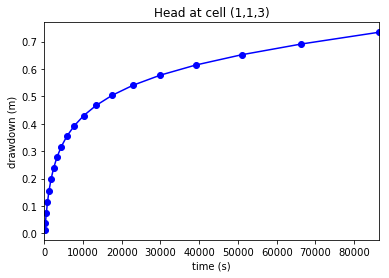

In [31]:
# Plot the drawdown versus time
idx = (0, 0, 2)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('drawdown (m)')
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-')
plt.xlim(0, ts[:, 0].max())

(0, 86400.0)

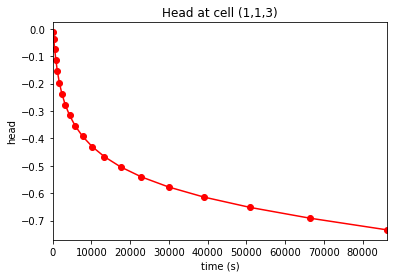

In [32]:
# Plot the head versus time
idx = (0, 0, 2)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('head')
plt.plot(ts[:, 0], ts[:, 1], 'ro-')
plt.xlim(0, ts[:, 0].max())

# Theis Equation

$$s = \frac{Q}{(4{\pi}T)} \cdot W(u)$$

where:

**s** = drawdown

**Q** = pumping rate

**T** = Transmissivity

**S** = Storage

**r** = radius (the distance from the well to where you want to measure drawdown)

$$u = \frac{r^2S}{4Tt}$$

In [ ]:
def u_calc(r, S, T, t):
    u = r ** 2 * S / 4. / T / t
    return u

def well_function(u):
    return scipy.special.exp1(u)

def drawdown(Q, r, S, T, t):
    u = u_calc(r, S, T, t)
    s = Q / 4. / np.pi / T * well_function(u)
    return s

def distance(x, y, xp, yp):
    return np.sqrt((x - xp) ** 2 + (y - yp) ** 2)

In [ ]:
# Plot the drawdown versus time using the formula for drawdown
plt.subplot(1, 1, 1)
ttl = 'Drawdown at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx so that 
#it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (s)') #labels the x-axis
plt.ylabel('drawdown (m)') #labels the y-axis

d=drawdown(Q=0.004, r=55, S=0.00075, T=0.0023, t=ts[:, 0])
    
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-') #(x, y, color/type of line)
#here we do "0-ts" to make the values negative because drawdown is showing the water levels DECREASE
plt.xlim(0, ts[:, 0].max())

## MODEL OUTPUT
_Drawdowns versus time are tabulated in Table 1.4 for each of the four cases. Comparison is also made to the analytical solution of Theis. A drawdown versus time plot is shown in Figure 1.2 for the best comparison case (the refined quadrant) and the worst comparison case (the coarse quadrant). Other cases are not shown, but are generally very similar to the refined quadrant case._

### Table 1.4 Drawdown versus time for each model configuration

| Time Step | Time (sec) | Analytic | Full grid (case a) | Quadrant (case b) | Refined Quadrant (case c) | Pie Wedge (case d) |
|-----------|------------|----------|--------------------|-------------------|---------------------------|--------------------|
| 1         | 137.1      | 0.009    | 0.017              | 0.010             | 0.014                     | 0.013              |
| 2         | 315.3      | 0.044    | 0.048              | 0.030             | 0.043                     | 0.039              |
| 3         | 547.1      | 0.086    | 0.085              | 0.059             | 0.079                     | 0.074              |
| 4         | 848.6      | 0.129    | 0.126              | 0.092             | 0.120                     | 0.114              |
| 5         | 1239.9     | 0.170    | 0.167              | 0.128             | 0.160                     | 0.155              |
| 6         | 1748.9     | 0.210    | 0.208              | 0.165             | 0.201                     | 0.197              |
| 7         | 2410.7     | 0.249    | 0.248              | 0.203             | 0.241                     | 0.237              |
| 8         | 3271.1     | 0.288    | 0.288              | 0.240             | 0.280                     | 0.277              |
| 9         | 4389.5     | 0.326    | 0.327              | 0.278             | 0.320                     | 0.316              |
| 10        | 5843.4     | 0.364    | 0.365              | 0.315             | 0.358                     | 0.354              |
| 11        | 7733.6     | 0.401    | 0.403              | 0.353             | 0.397                     | 0.392              |
| 12        | 10190.7    | 0.438    | 0.441              | 0.390             | 0.434                     | 0.429              |
| 13        | 13385.1    | 0.475    | 0.479              | 0.427             | 0.471                     | 0.467              |
| 14        | 17537.7    | 0.512    | 0.516              | 0.464             | 0.508                     | 0.504              |
| 15        | 22936.1    | 0.549    | 0.553              | 0.501             | 0.545                     | 0.540              |
| 16        | 29954.0    | 0.586    | 0.591              | 0.538             | 0.582                     | 0.577              |
| 17        | 39077.4    | 0.622    | 0.628              | 0.575             | 0.619                     | 0.614              |
| 18        | 50937.7    | 0.659    | 0.665              | 0.613             | 0.656                     | 0.651              |
| 19        | 66356.1    | 0.695    | 0.704              | 0.651             | 0.697                     | 0.691              |
| 20        | 86400.0    | 0.731    | 0.744              | 0.691             | 0.738                     | 0.733              |

## DISCUSSION OF RESULTS
_With the exception of the coarse quadrant grid (case b), the MODFLOW results compare well to the analytic solution. The numerical results are generally within 0.005 m of the analytic. An exact comparison is not attained because of the approximations made in the numerical model. These include: 

1) use of a discrete rather than continuous spatial domain, 

2) use of a discrete rather than continuous time domain, 

3) use of an iterative solution with a closure tolerance, and 

4) artifical placement of boundaries.

_The distant_ [no-flow boundary](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#n) _is only a small factor in this analysis because it is placed far enough from the stress so that drawdown at the boundary is very limited. There is a significant departure from the Theis curve at the_ [final time step](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#f), _however, as the non-infinite nature of the model domain becomes a factor. The comparison would continue to deteriorate if the model were run for longer time._

_This problem illustrates three methods of modeling radial flow to a well. The first placing the well at the center of a rectangular grid, is the most intuitive approach to this problem, but is not the most efficient. The second method, the quadrant recognizes symmetry of flow. Some care must be taken in designing the grid. The third method, the pie wedge, also recognizes symmetry but involves fairly labor intensive parameter adjustment to approximate a wedge shaped grid._

_The quadrant grid is a satisfactory approximation, provided it is sufficiently fine near the pumping well. The predominant reason for the approximation error noted in the first quadrant analyzed (case b) is because the block-centered grid approach models a larger area than a quadrant. There will always be an extra 1/2 grid block on the margins of the model area and therefore extra storage in the model domain. The extra storage accounts for a majority of the underprediction of drawdown in case b. When the size of the blocks on the margins is reduced in case c, the error is also reduced._

_The pie-wedge grid provides a reasonable approximation for this particular problem. The user is cautioned that it is conceptually difficult and error-prone to develop the grid and aquifer parameters for this type of configuration. Some approximation errors may become more apparent if larger areas or greater wedge angles are used. Although this is an appropriate methodology, its main reason for presentation in this manual is to reinforce the user’s understanding of the relationship between transmissivity, grid spacing, and conductance._
